# **Facial recognition to detect mood & Recommend Music Based on Mood** 

In [35]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers

In [36]:
import os
print(os.listdir('../input/fer2013'))

['test', 'train']


In [37]:
train_dir ='../input/fer2013/train'
test_dir  ='../input/fer2013/test'

In [38]:
print('Train Directory :')
print(os.listdir('../input/fer2013/train'))

Train Directory :
['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [39]:
print("Test_Directory :")
print(os.listdir('../input/fer2013/test'))

Test_Directory :
['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [40]:
print('Count of Images in Training Set: ')
for exp in os.listdir(train_dir):
    print(str(len(os.listdir(train_dir+'/'+exp)))+" "+exp+" "+"images")

Count of Images in Training Set: 
3171 surprise images
4097 fear images
3995 angry images
4965 neutral images
4830 sad images
436 disgust images
7215 happy images


In [41]:
print('Count of Images in Testing Set: ')
for exp in os.listdir(test_dir):
    print(str(len(os.listdir(test_dir+'/'+exp)))+" "+exp +" "+"images")

Count of Images in Testing Set: 
831 surprise images
1024 fear images
958 angry images
1233 neutral images
1247 sad images
111 disgust images
1774 happy images


In [42]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

## Train Images

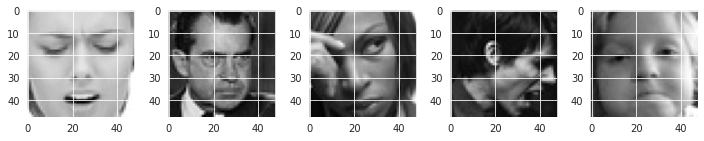

In [43]:
plot_images(train_dir+"/"+"angry")

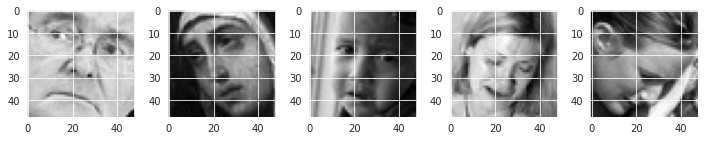

In [44]:
plot_images(train_dir+"/"+"sad")

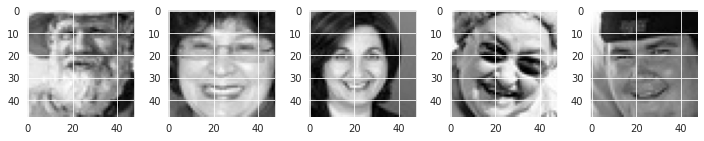

In [45]:
plot_images(train_dir+"/"+"happy")

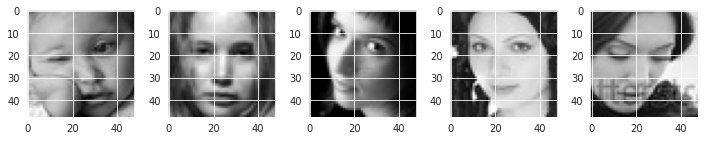

In [46]:
plot_images(train_dir+"/"+"neutral")

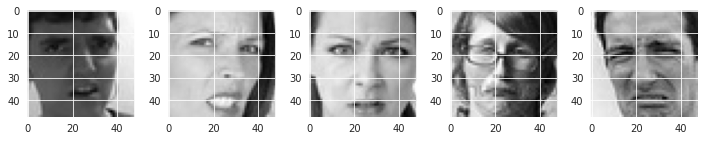

In [47]:
plot_images(train_dir+"/"+"disgust")

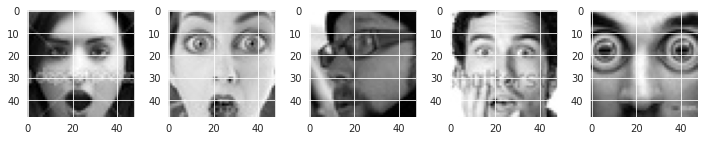

In [48]:
plot_images(train_dir+"/"+"surprise")

In [49]:
img_size = 48 #original size of the image

In [50]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [51]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


## Modeling

In [52]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [53]:
epochs = 60
batch_size = 64

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

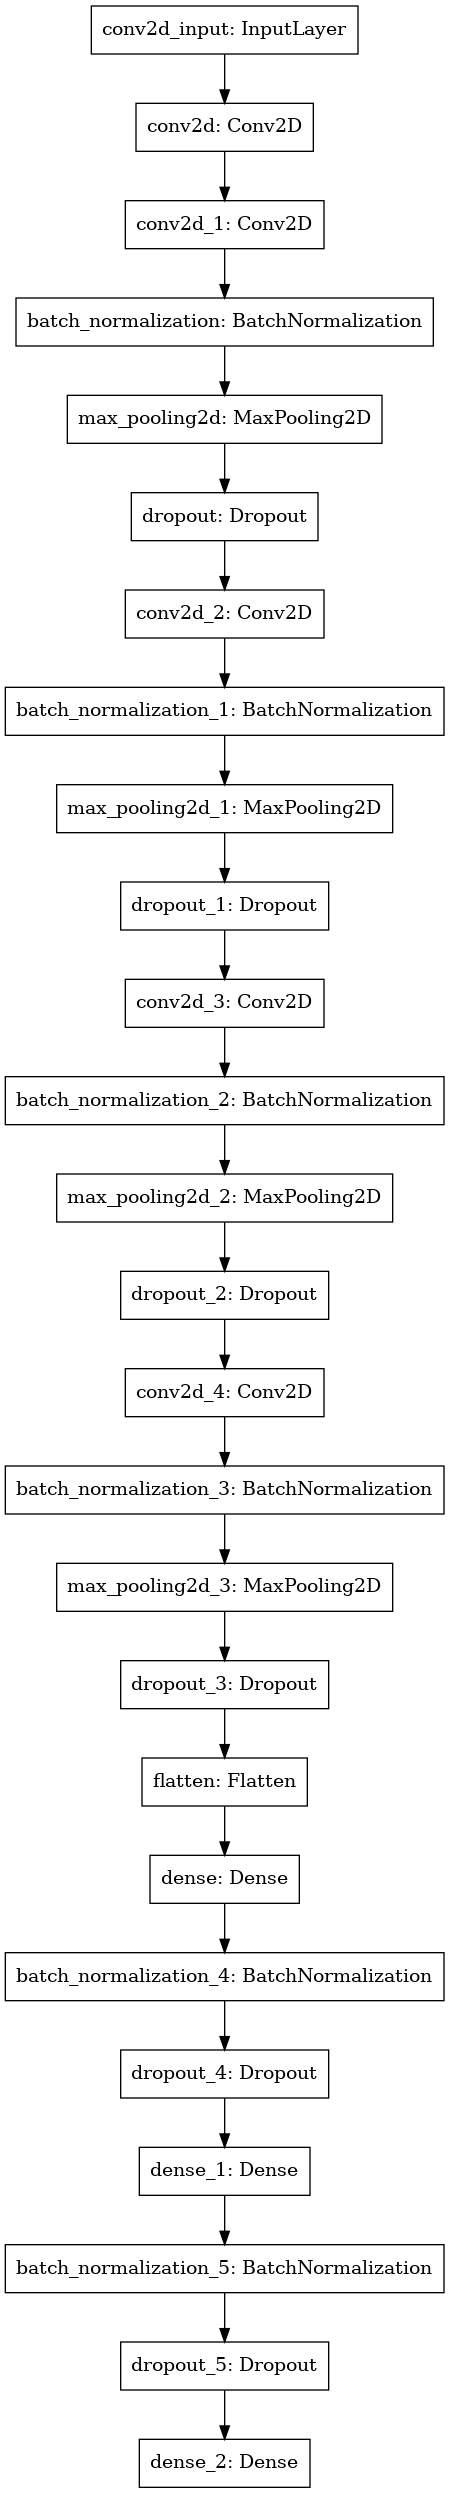

In [55]:
plot_model(model)

In [56]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 134s 352ms/step - loss: 9.5894 - accuracy: 0.1783 - val_loss: 9.0804 - val_accuracy: 0.1355
Epoch 2/60
359/359 [==============================] - 33s 92ms/step - loss: 8.4776 - accuracy: 0.2223 - val_loss: 7.5127 - val_accuracy: 0.2779
Epoch 3/60
359/359 [==============================] - 33s 92ms/step - loss: 7.4905 - accuracy: 0.2506 - val_loss: 6.6154 - val_accuracy: 0.3080
Epoch 4/60
359/359 [==============================] - 33s 92ms/step - loss: 6.5421 - accuracy: 0.2701 - val_loss: 5.6863 - val_accuracy: 0.3205
Epoch 5/60
359/359 [==============================] - 33s 92ms/step - loss: 5.6279 - accuracy: 0.3013 - val_loss: 4.9633 - val_accuracy: 0.3401
Epoch 6/60
359/359 [==============================] - 33s 92ms/step - loss: 4.8542 - accuracy: 0.3321 - val_loss: 4.2353 - val_accuracy: 0.3869
Epoch 7/60
359/359 [==============================] - 34s 95ms/step - loss: 4.1934 - accuracy: 0.3628 - val_loss: 3.8607 - val_accurac

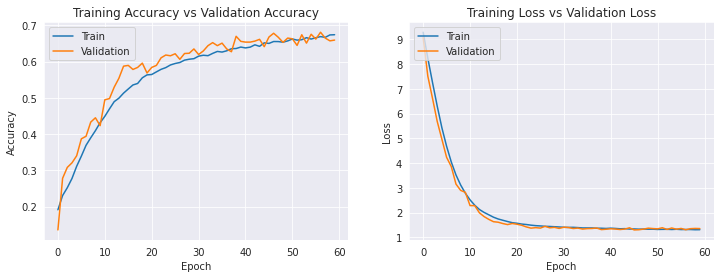

In [57]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [58]:
model.save('model_optimal.h5')

In [59]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 2s 64ms/step - loss: 1.3559 - accuracy: 0.6592
final train accuracy = 71.70 , validation accuracy = 65.92


In [60]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [61]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_size,img_size),
    color_mode="grayscale",
    shuffle=True,
    batch_size=64,
)

Found 7178 images belonging to 7 classes.


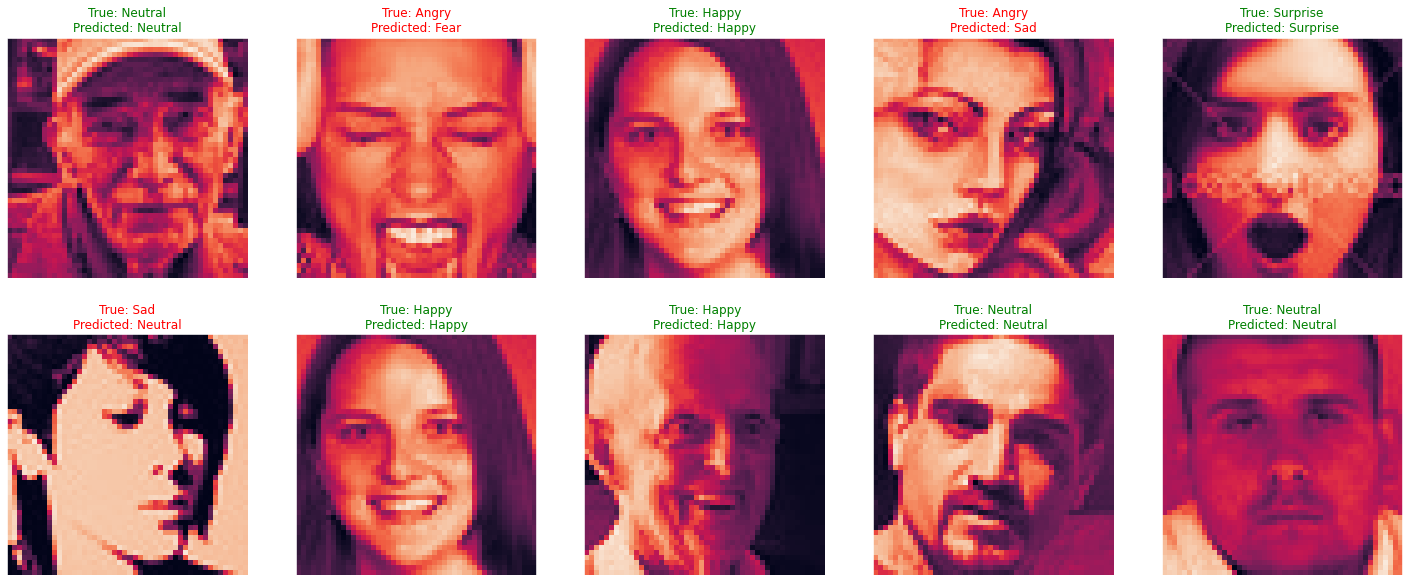

<Figure size 432x288 with 0 Axes>

In [65]:
Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Prediction = np.argmax(model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))
    ax.imshow(Random_Img)
    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

In [66]:
Predictions =model.predict(test_generator)
#Choosing highest probalbilty class in every prediction 
Model_Predictions = np.argmax(Predictions, axis=1)

Text(0.5, 1.0, 'Confusion Matrix')

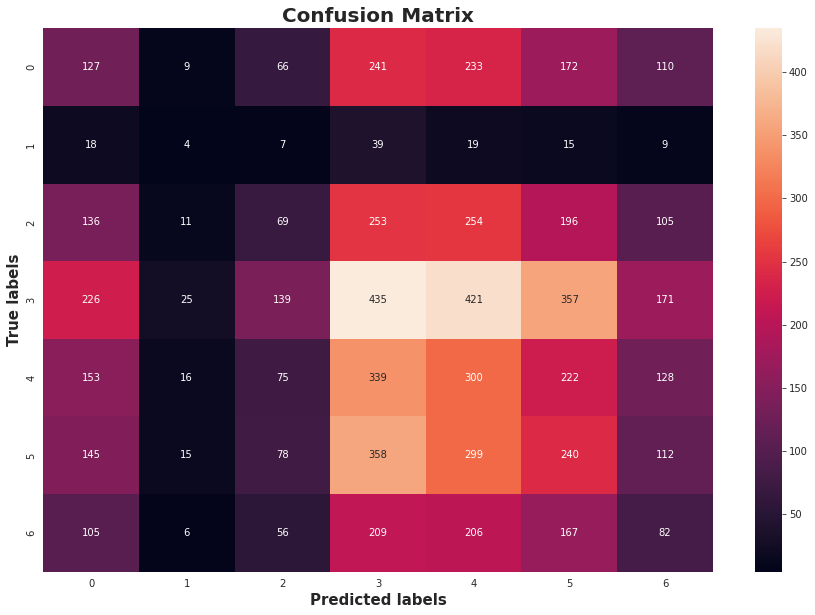

In [67]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax= plt.subplots(figsize=(15,10))
cm=confusion_matrix(test_generator.labels, Model_Predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

## Music Player 

In [68]:
music_df =pd.read_csv("/kaggle/input/spotify-music-data-to-identify-the-moods/data_moods.csv")

In [69]:
music_df = music_df[['name','artist','mood','popularity']]
music_df.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [75]:
music_df["mood"].value_counts()

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

In [76]:
music_df["popularity"].value_counts()

0     92
51    23
52    22
55    21
50    21
      ..
80     1
15     1
21     1
24     1
88     1
Name: popularity, Length: 83, dtype: int64

In [77]:
Play = music_df[music_df['mood'] =='Calm' ]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Curiosity,Beau Projet,Calm,60
2,Escaping Time,Benjamin Martins,Calm,60
3,Just Look at You,369,Calm,59
4,Vague,Amaranth Cove,Calm,59


In [110]:
# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(pred_class):
    
    if( pred_class=='Disgust' ):

        Play = music_df[music_df['mood'] =='Sad' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Happy' or pred_class=='Sad' ):

        Play = music_df[music_df['mood'] =='Happy' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Fear' or pred_class=='Angry' ):

        Play = music_df[music_df['mood'] =='Calm' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)
        
    if( pred_class=='Surprise' or pred_class=='Neutral' ):

        Play = music_df[music_df['mood'] =='Energetic' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

## OpenCV

In [89]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
    
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")  

--2023-01-16 18:59:00--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.2’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2023-01-16 18:59:00 (28.2 MB/s) - ‘haarcascade_frontalface_default.xml.2’ saved [930127/930127]



In [102]:
def load_and_prep_image(filename, img_shape = 48):
    img = cv2.imread(filename)
    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    for x,y,w,h in faces:
        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
        faces = faceCascade.detectMultiScale(roi_Img, 1.1, 4)
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]
    Img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Img= cv2.resize(Img,(img_shape,img_shape))
    Img = Img/255.
    return Img

In [108]:
def pred_and_plot(filename, class_names):
    # Import the target image 
    img = load_and_prep_image(filename)
    # Make a prediction
    pred = model.predict(tf.expand_dims(Random_Img, axis=0) , verbose=0)
    # Get the predicted class
    pred_class = class_names[pred.argmax()]
    # Plot the image and predicted class
    #plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);
    Recommend_Songs(pred_class)

No Faces Detected


,name,artist,mood,popularity
0,Chop Suey!,System Of A Down,Energetic,79
1,Killing In The Name,Rage Against The Machine,Energetic,78
2,Dani California,Red Hot Chili Peppers,Energetic,77
3,Duality,Slipknot,Energetic,76
4,Uprising,Muse,Energetic,75


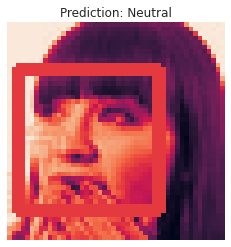

In [111]:

pred_and_plot("/kaggle/input/fer2013/test/surprise/PrivateTest_104142.jpg",Emotion_Classes)

No Faces Detected


,name,artist,mood,popularity
0,Chop Suey!,System Of A Down,Energetic,79
1,Killing In The Name,Rage Against The Machine,Energetic,78
2,Dani California,Red Hot Chili Peppers,Energetic,77
3,Duality,Slipknot,Energetic,76
4,Uprising,Muse,Energetic,75


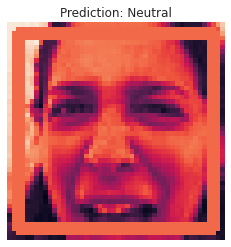

In [115]:
pred_and_plot("/kaggle/input/fer2013/test/disgust/PrivateTest_19671520.jpg",Emotion_Classes)

In [ ]:
## Working on it...